# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow gpu opencv python matplotlib

In [2]:
# !pip list

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
len(gpus)

1

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '2021Winter-Fluorescence'

In [9]:
os.listdir(data_dir)

['2-mycelium_grown', '4-fruiting_body_grown-5-spore_massively_produced']

In [10]:
os.listdir(os.path.join(data_dir, '2-mycelium_grown'))

['CMFG0101_20211214T1144.jpg',
 'CMFG0101_20211214T1145.jpg',
 'CMFG0101_20211214T1602.jpg',
 'CMFG0101_20211215T1000.jpg',
 'CMFG0101_20211215T1120.jpg',
 'CMFG0101_20211217T1000.jpg',
 'CMFG0101_20211217T1200.jpg',
 'CMFG0101_20211217T1400.jpg',
 'CMFG0101_20211218T1000.jpg',
 'CMFG0101_20211218T1200.jpg',
 'CMFG0101_20211218T1400.jpg',
 'CMFG0101_20211219T1000.jpg',
 'CMFG0101_20211219T1200.jpg',
 'CMFG0101_20211219T1400.jpg',
 'CMFG0101_20211220T1000.jpg',
 'CMFG0101_20211220T1200.jpg',
 'CMFG0101_20211220T1400.jpg',
 'CMFG0101_20211221T1000.jpg',
 'CMFG0101_20211221T1200.jpg',
 'CMFG0101_20211221T1400.jpg',
 'CMFG0101_20211222T1000.jpg',
 'CMFG0101_20211222T1200.jpg',
 'CMFG0101_20211222T1400.jpg',
 'CMFG0101_20211223T1000.jpg',
 'CMFG0101_20211223T1200.jpg',
 'CMFG0101_20211223T1400.jpg',
 'CMFG0101_20211224T1000.jpg',
 'CMFG0101_20211224T1200.jpg',
 'CMFG0101_20211224T1400.jpg',
 'CMFG0101_20211225T1000.jpg',
 'CMFG0101_20211225T1200.jpg',
 'CMFG0101_20211226T1000.jpg',
 'CMFG01

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [13]:
image_exts[2]

'bmp'

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 1.3 Load Data

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('2021Winter-Fluorescence')

Found 286 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
len(batch)

2

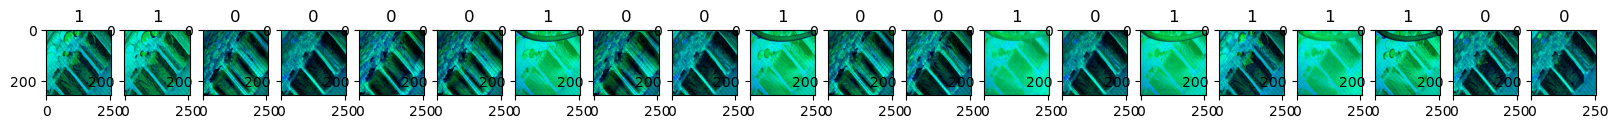

In [20]:
fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 4.74406391e-01, 6.24877453e-01],
          [5.88618265e-03, 5.12568951e-01, 6.63108945e-01],
          [9.74264741e-03, 5.20492494e-01, 6.05909169e-01],
          ...,
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [0.00000000e+00, 5.08578448e-03, 1.16421573e-03],
          [0.00000000e+00, 7.84313772e-03, 3.92156886e-03]],
 
         [[0.00000000e+00, 5.17459393e-01, 5.53059876e-01],
          [0.00000000e+00, 5.08578420e-01, 5.61615348e-01],
          [0.00000000e+00, 5.11274517e-01, 5.70098042e-01],
          ...,
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00],
          [6.61764713e-03, 1.44607844e-02, 1.05392160e-02],
          [0.00000000e+00, 3.92156886e-03, 0.00000000e+00]],
 
         [[0.00000000e+00, 5.28527141e-01, 5.40291846e-01],
          [0.00000000e+00, 5.16341150e-01, 5.62174499e-01],
          [3.92156886e-03, 5.00417411e-01, 5.78799009e-01],
          ...,
          [0.00000000e+00, 1.17647061e-02, 1.5686

In [23]:
data.as_numpy_iterator().next()[0].max()

1.0

In [24]:
data.as_numpy_iterator().next()[0].min()

0.0

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

In [27]:
batch[0].max()

1.0

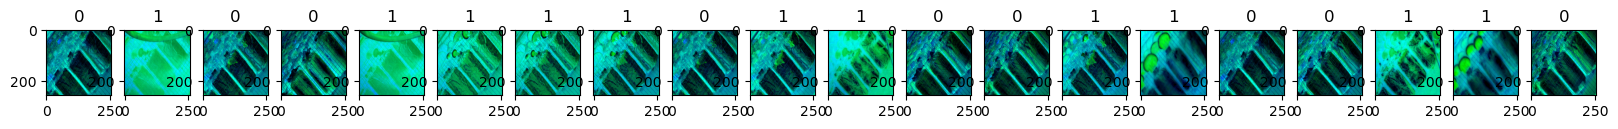

In [28]:
fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [29]:
len(data)

9

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [31]:
train_size + val_size + test_size

9

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

1

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [34]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [40]:
logdir='logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 10s 1s/step - loss: 0.5609 - accuracy: 0.7656 - val_loss: 0.3053 - val_accuracy: 0.9844
Epoch 2/20
6/6 [==============================] - 9s 1s/step - loss: 0.1943 - accuracy: 0.9531 - val_loss: 0.1426 - val_accuracy: 0.9375
Epoch 3/20
6/6 [==============================] - 8s 1s/step - loss: 0.0879 - accuracy: 0.9635 - val_loss: 0.0572 - val_accuracy: 0.9844
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 8s 1s/step - loss: 0.0232 - accuracy: 0.9896 - val_loss: 0.0237 - val_accuracy: 0.9844
Epoch 6/20
6/6 [==============================] - 10s 1s/step - loss: 0.0329 - accuracy: 0.9844 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 7/20
6/6 [==============================] - 10s 1s/step - loss: 0.0321 - accuracy: 0.9844 - val_loss: 0.0536 - val_accuracy: 0.9844
Epoch 8/20
6/6 [======================

## 3.3 Plot Performance

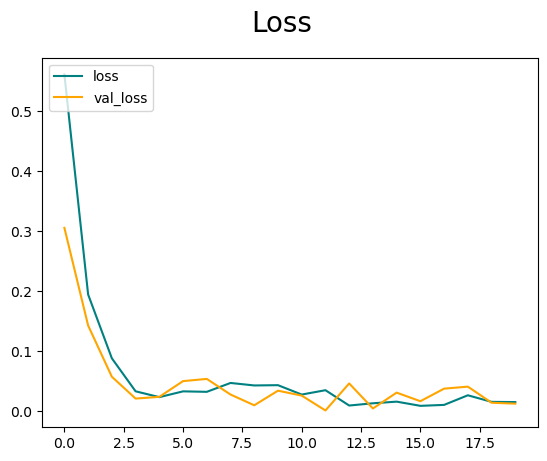

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

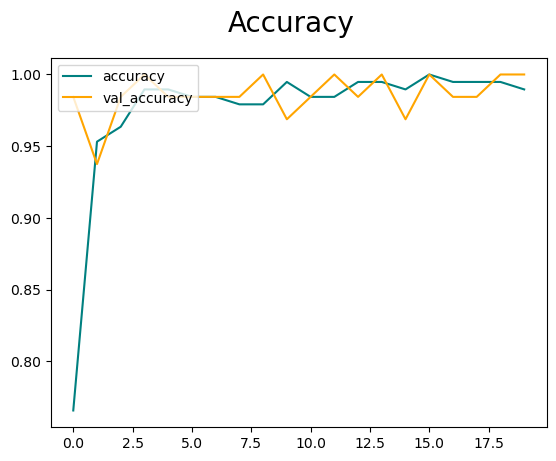

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
len(test)

1

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 410ms/step


In [49]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [50]:
import cv2

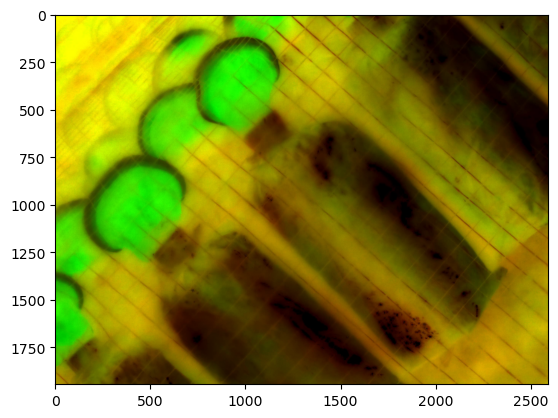

In [51]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img = cv2.imread('2021Winter-Fluorescence/4-fruiting_body_grown-5-spore_massively_produced/CMFG0101_20220412T1200.jpg')
plt.imshow(img)
plt.show()

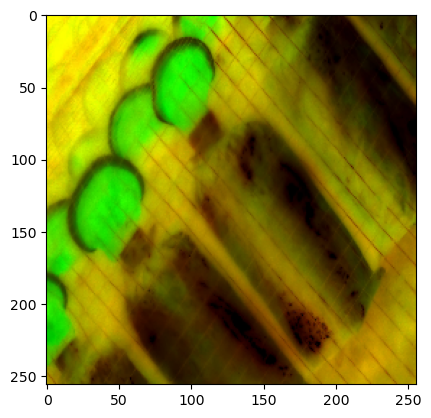

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[2.5007812e+02, 2.4807812e+02, 0.0000000e+00],
        [2.5500000e+02, 2.5331250e+02, 0.0000000e+00],
        [2.5500000e+02, 2.5500000e+02, 0.0000000e+00],
        ...,
        [4.8000000e+01, 3.6000000e+01, 1.4062500e+00],
        [5.0219727e+01, 3.9516602e+01, 9.2285156e-01],
        [5.7437500e+01, 5.0437500e+01, 4.3750000e-01]],

       [[2.4921875e+02, 2.4721875e+02, 0.0000000e+00],
        [2.5500000e+02, 2.5410938e+02, 1.0937500e-01],
        [2.5500000e+02, 2.5500000e+02, 0.0000000e+00],
        ...,
        [5.4020508e+01, 3.8931641e+01, 1.0937500e-01],
        [5.3502930e+01, 4.4203125e+01, 0.0000000e+00],
        [5.4109375e+01, 4.6109375e+01, 0.0000000e+00]],

       [[2.5086621e+02, 2.4886621e+02, 0.0000000e+00],
        [2.5500000e+02, 2.5400000e+02, 0.0000000e+00],
        [2.5500000e+02, 2.5432812e+02, 4.1894531e-01],
        ...,
        [5.7000000e+01, 4.0000000e+01, 1.0000000e+00],
        [5.7333008e+01

In [54]:
resize.shape

TensorShape([256, 256, 3])

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [56]:
yhat

array([[0.89511704]], dtype=float32)

In [57]:
if yhat > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 4-fruiting_body_grown-5-spore_massively_produced


# 5. Save the Model

## 5.1 Save the Model

In [59]:
model.save(os.path.join('models', 'lingzhimodel.h5'))

In [60]:
os.path.join('models', 'lingzhimodel.h5')

'models\\lingzhimodel.h5'

In [1]:
from tensorflow.keras.models import load_model
import os

In [2]:
new_model = load_model(os.path.join('models', 'lingzhimodel.h5'))

## 5.2 Test

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### 5.2.1 Check is mycelium_grown

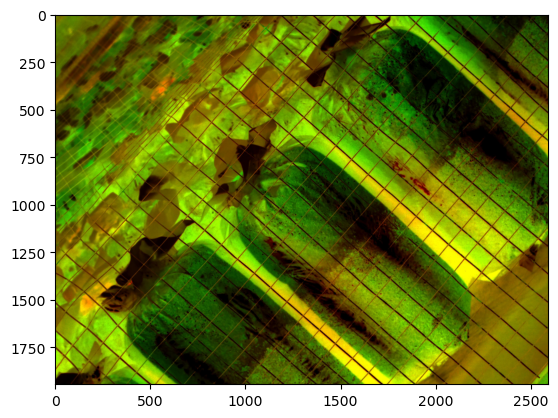

In [7]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img = cv2.imread('datasets/test1/mycelium_grown.CMFG0101_20211225T1200.jpg.jpg')
plt.imshow(img)
plt.show()

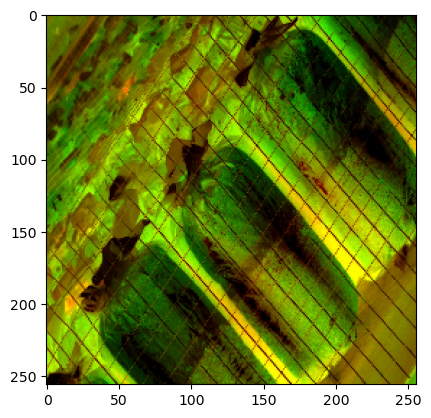

In [9]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [10]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 234ms/step


In [11]:
data_dir = '2021Winter-Fluorescence-Histogram-Denoisers'
os.listdir(data_dir)

['2-mycelium_grown', '4-fruiting_body_grown-5-spore_massively_produced']

In [12]:
if yhatnew > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 2-mycelium_grown


### 5.2.2 Check is fruiting_body_grown-&-spore_massively_produced

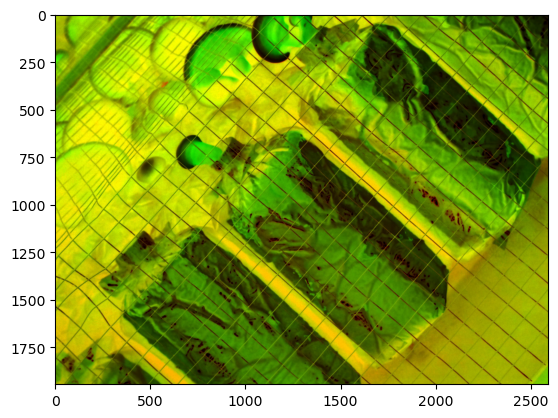

In [26]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img_fr = cv2.imread('datasets/test1/fruiting_body_grown-spore_massively_produced.CMFG0101_20220206T1200.jpg.jpg')
plt.imshow(img_fr)
plt.show()

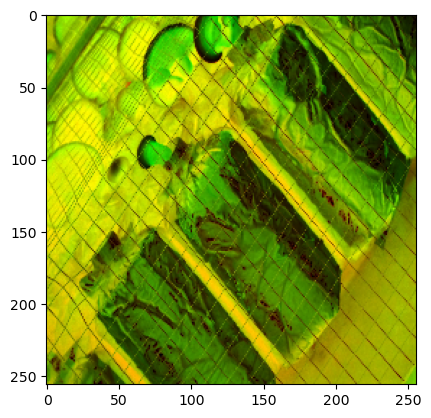

In [27]:
resize_fr = tf.image.resize(img_fr, (256,256))
plt.imshow(resize_fr.numpy().astype(int))
plt.show()

In [28]:
yhatnew_fr = new_model.predict(np.expand_dims(resize_fr/255, 0))

1/1 [==============================] - 0s 93ms/step


In [29]:
if yhatnew_fr > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 4-fruiting_body_grown-5-spore_massively_produced
